<a href="https://colab.research.google.com/github/sahithya2604/deep-learning/blob/main/phishing_website_detection_cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

## LOADING DATASET

In [ ]:
df = pd.read_csv('/content/dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [ ]:
#label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [ ]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [ ]:
Y1 = df['labels']
X1 = df.drop(columns = ['url','labels','status'])

In [ ]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [ ]:
Y1.head(2)

0    0
1    1
Name: labels, dtype: int64

In [ ]:
#data for learning without features

X2 = df['url']
X2.head(2)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
Name: url, dtype: object

## CREATING DATASET WITH PRIOR FEATURE EXTRACTION

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(9144, 87, 1)

## CREATING DATASET WITHOUT PRIOR FEATURE EXTRACTION

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

Streaming output truncated to the last 5000 lines.
6430 / 11430
6431 / 11430
6432 / 11430
6433 / 11430
6434 / 11430
6435 / 11430
6436 / 11430
6437 / 11430
6438 / 11430
6439 / 11430
6440 / 11430
6441 / 11430
6442 / 11430
6443 / 11430
6444 / 11430
6445 / 11430
6446 / 11430
6447 / 11430
6448 / 11430
6449 / 11430
6450 / 11430
6451 / 11430
6452 / 11430
6453 / 11430
6454 / 11430
6455 / 11430
6456 / 11430
6457 / 11430
6458 / 11430
6459 / 11430
6460 / 11430
6461 / 11430
6462 / 11430
6463 / 11430
6464 / 11430
6465 / 11430
6466 / 11430
6467 / 11430
6468 / 11430
6469 / 11430
6470 / 11430
6471 / 11430
6472 / 11430
6473 / 11430
6474 / 11430
6475 / 11430
6476 / 11430
6477 / 11430
6478 / 11430
6479 / 11430
6480 / 11430
6481 / 11430
6482 / 11430
6483 / 11430
6484 / 11430
6485 / 11430
6486 / 11430
6487 / 11430
6488 / 11430
6489 / 11430
6490 / 11430
6491 / 11430
6492 / 11430
6493 / 11430
6494 / 11430
6495 / 11430
6496 / 11430
6497 / 11430
6498 / 11430
6499 / 11430
6500 / 11430
6501 / 11430
6502 / 11430


In [ ]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [ ]:
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [ ]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [ ]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((87, 1), (1000, 1))

## Evaluation Helper Functions

In [ ]:
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()

    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()


In [ ]:
def conf_matrix(X_test,Y_test,model):

    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

## CNN MODEL

In [ ]:
from keras import Sequential

def CNN(input_size):

    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))

    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 87, 16)            64        
                                                                 
 dropout (Dropout)           (None, 87, 16)            0         
                                                                 
 batch_normalization (Batch  (None, 87, 16)            64        
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 44, 16)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 32)            1568      
                                                                 
 dropout_1 (Dropout)         (None, 44, 32)            0

## CNN MODEL ON FIRST DATASET

In [ ]:
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 [============================>.] - ETA: 0s - loss: 0.8154 - accuracy: 0.6088
Epoch 1: val_loss improved from inf to 0.68872, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 9s 100ms/step - loss: 0.8157 - accuracy: 0.6086 - val_loss: 0.6887 - val_accuracy: 0.5648
Epoch 2/200
 1/58 [..............................] - ETA: 4s - loss: 0.6355 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.6574 - accuracy: 0.6669
Epoch 2: val_loss did not improve from 0.68872
58/58 [==============================] - 4s 74ms/step - loss: 0.6582 - accuracy: 0.6664 - val_loss: 0.7034 - val_accuracy: 0.5610
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.6328 - accuracy: 0.6723
Epoch 3: val_loss did not improve from 0.68872
58/58 [==============================] - 4s 74ms/step - loss: 0.6327 - accuracy: 0.6722 - val_loss: 0.7459 - val_accuracy: 0.5785
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.6889
Epoch 4: val_loss improved from 0.68872 to 0.65795, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 5s 89ms/step - loss: 0.6095 - accuracy: 0.6886 - val_loss: 0.6580 - val_accuracy: 0.6091
Epoch 5/200
57/58 [============================>.] - ETA: 0s - loss: 0.6069 - accuracy: 0.6908
Epoch 5: val_loss did not improve from 0.65795

In [ ]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

72/72 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.6312


[0.6966160535812378, 0.6312335729598999]

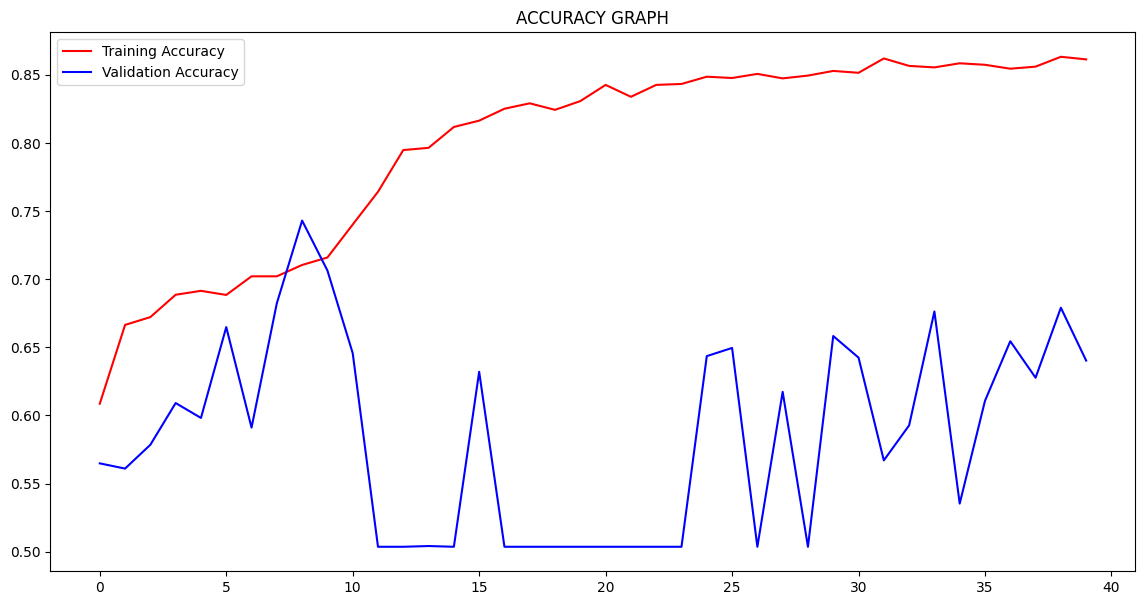

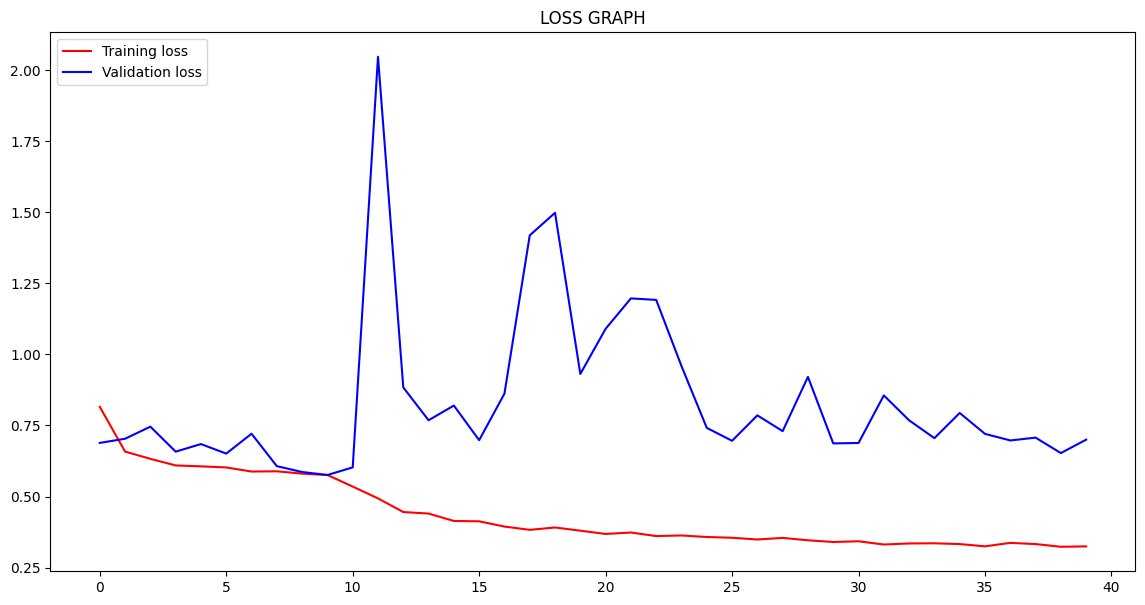

In [ ]:
eval_graph(CNN_results_1)

In [ ]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: labels, Length: 2286, dtype: int64

72/72 [==============================] - 1s 7ms/step


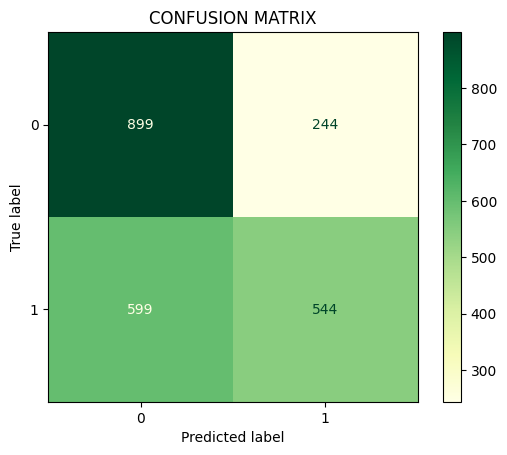

In [ ]:
conf_matrix(X_test1,Y_test1,CNN_model1)

## CNN MODEL ON SECOND DATASET

In [ ]:
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.8035 - accuracy: 0.7122
Epoch 1: val_loss improved from inf to 0.69277, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 46s 726ms/step - loss: 0.8035 - accuracy: 0.7122 - val_loss: 0.6928 - val_accuracy: 0.5036
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - ETA: 0s - loss: 0.4713 - accuracy: 0.7813
Epoch 2: val_loss improved from 0.69277 to 0.69209, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 43s 735ms/step - loss: 0.4713 - accuracy: 0.7813 - val_loss: 0.6921 - val_accuracy: 0.4964
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.8107
Epoch 3: val_loss improved from 0.69209 to 0.68453, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 43s 738ms/step - loss: 0.4301 - accuracy: 0.8107 - val_loss: 0.6845 - val_accuracy: 0.5883
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3801 - accuracy: 0.8303
Epoch 4: val_loss improved from 0.68453 to 0.68082, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 42s 729ms/step - loss: 0.3801 - accuracy: 0.8303 - val_loss: 0.6808 - val_accuracy: 0.5036
Epoch 5/200
5

In [ ]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

72/72 [==============================] - 2s 33ms/step - loss: 0.2610 - accuracy: 0.9112


[0.26099371910095215, 0.911198616027832]

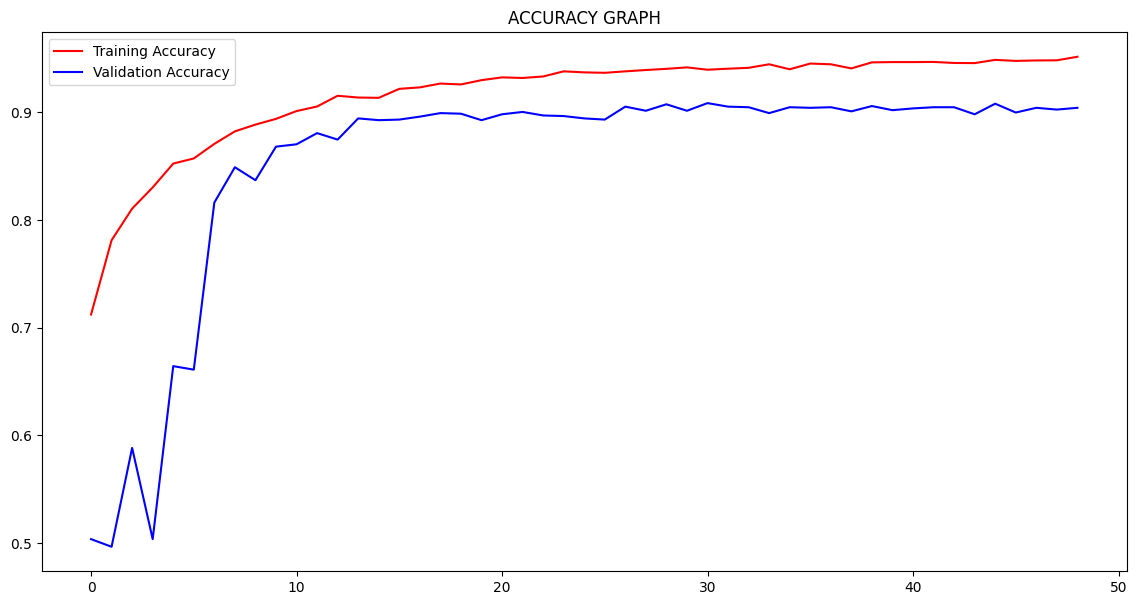

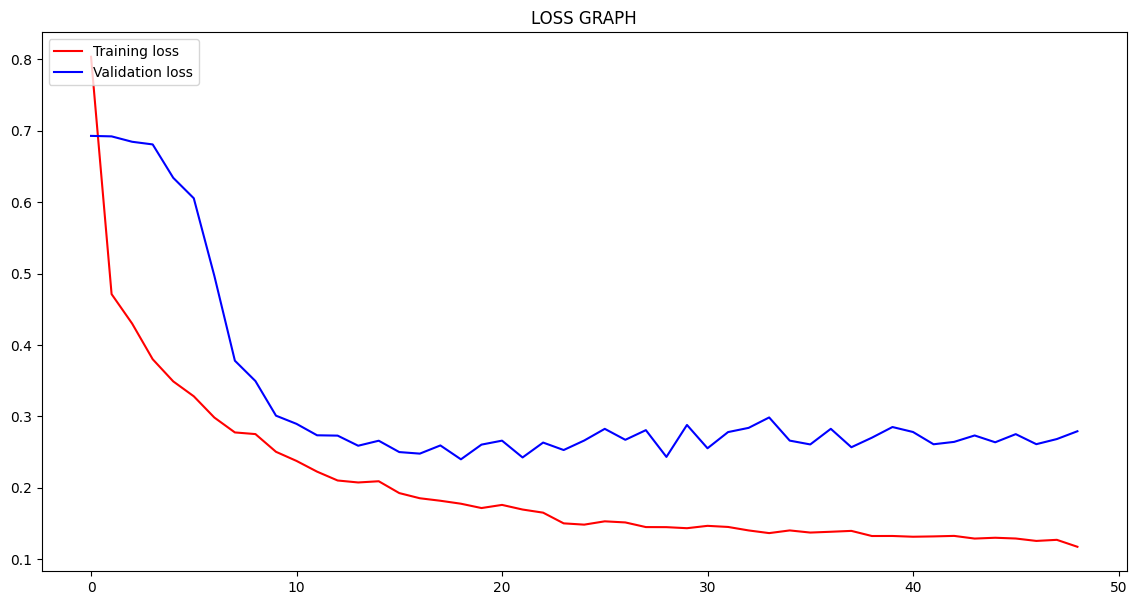

72/72 [==============================] - 4s 46ms/step


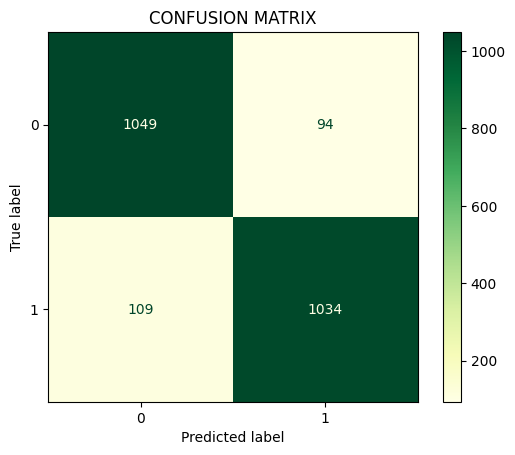

In [ ]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)

## CNN LSTM MODEL

In [ ]:
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))

    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)
CNN_LSTM_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 87, 16)            64        
                                                                 
 dropout_14 (Dropout)        (None, 87, 16)            0         
                                                                 
 batch_normalization_10 (Ba  (None, 87, 16)            64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 44, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 44, 32)            1568      
                                                                 
 dropout_15 (Dropout)        (None, 44, 32)           

## CNN_LSTM MODEL ON FIRST DATASET

In [ ]:
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.6495
Epoch 1: val_loss improved from inf to 0.67001, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 13s 131ms/step - loss: 0.6226 - accuracy: 0.6495 - val_loss: 0.6700 - val_accuracy: 0.5232
Epoch 2/200
 1/58 [..............................] - ETA: 4s - loss: 0.5141 - accuracy: 0.7578

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.5084 - accuracy: 0.7559
Epoch 2: val_loss did not improve from 0.67001
58/58 [==============================] - 5s 93ms/step - loss: 0.5079 - accuracy: 0.7564 - val_loss: 0.7561 - val_accuracy: 0.5260
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.7843
Epoch 3: val_loss did not improve from 0.67001
58/58 [==============================] - 6s 112ms/step - loss: 0.4720 - accuracy: 0.7843 - val_loss: 0.7054 - val_accuracy: 0.5271
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.4405 - accuracy: 0.7966
Epoch 4: val_loss did not improve from 0.67001
58/58 [==============================] - 5s 93ms/step - loss: 0.4406 - accuracy: 0.7964 - val_loss: 0.7780 - val_accuracy: 0.5369
Epoch 5/200
57/58 [============================>.] - ETA: 0s - loss: 0.4145 - accuracy: 0.8188
Epoch 5: val_loss did not improve from 0.67001
58/58 [==============================] - 7s 118ms/ste

72/72 [==============================] - 1s 11ms/step - loss: 0.4212 - accuracy: 0.8206


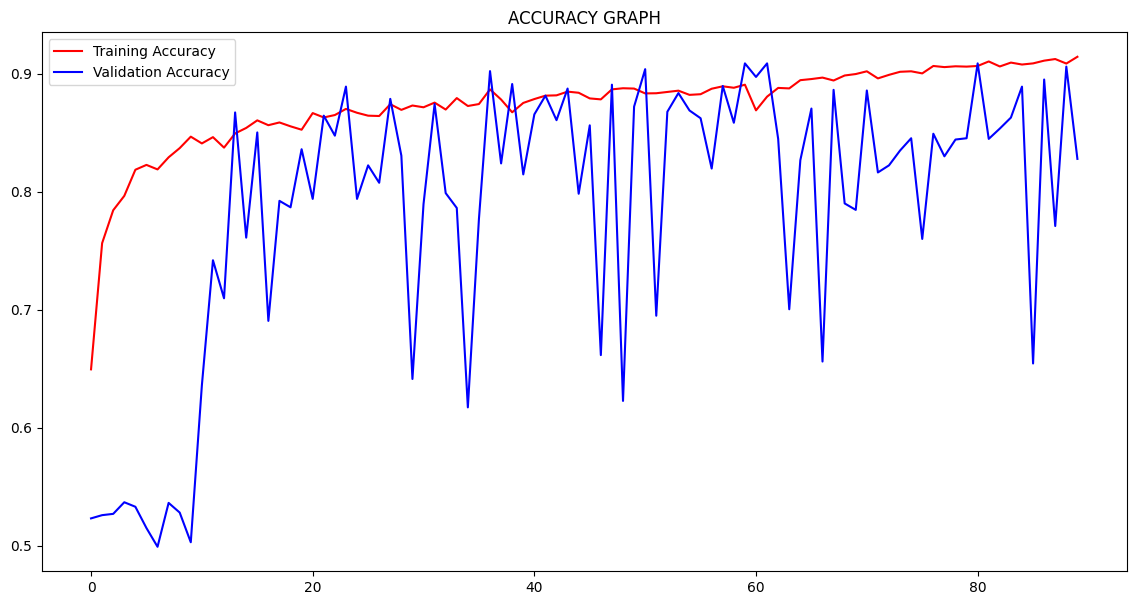

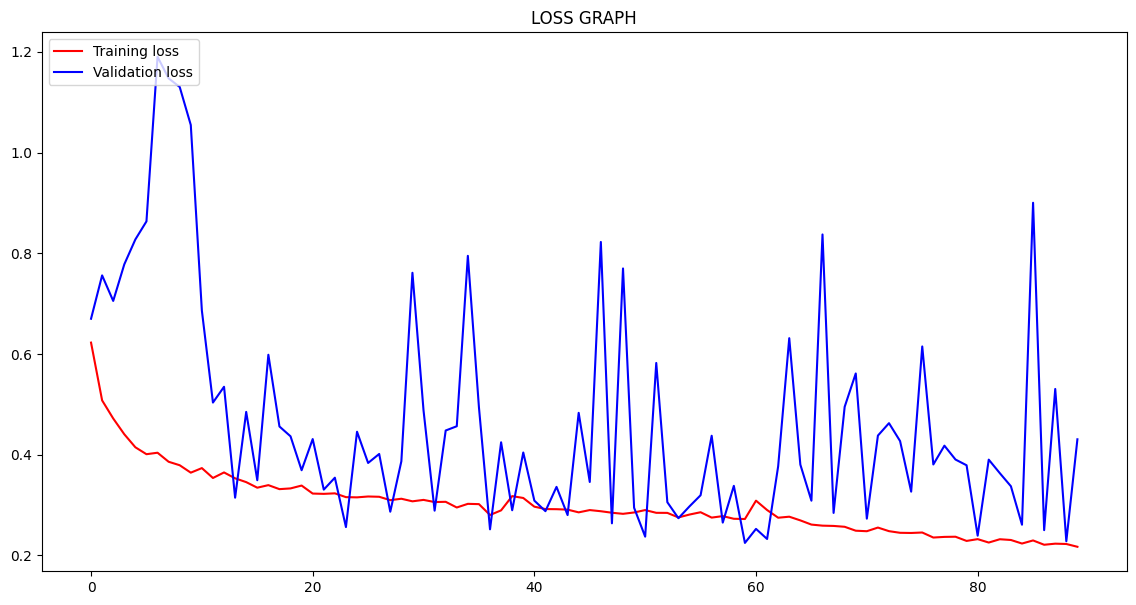

72/72 [==============================] - 1s 10ms/step


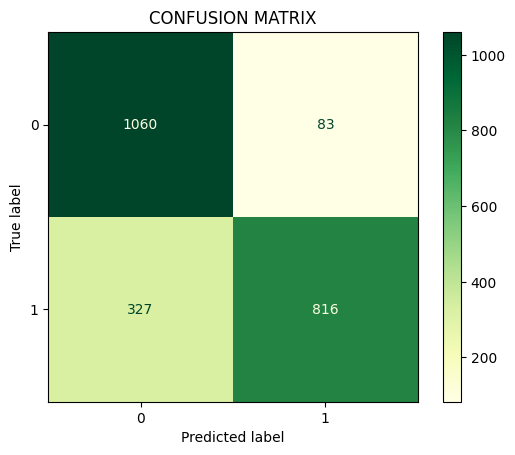

In [ ]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

## CNN_LSTM MODEL ON SECOND DATASET

In [ ]:
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.7299
Epoch 1: val_loss improved from inf to 0.69459, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 57s 893ms/step - loss: 0.5378 - accuracy: 0.7299 - val_loss: 0.6946 - val_accuracy: 0.4964
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - ETA: 0s - loss: 0.4290 - accuracy: 0.8059
Epoch 2: val_loss improved from 0.69459 to 0.68646, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 51s 882ms/step - loss: 0.4290 - accuracy: 0.8059 - val_loss: 0.6865 - val_accuracy: 0.5932
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8309
Epoch 3: val_loss improved from 0.68646 to 0.67850, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 51s 876ms/step - loss: 0.3802 - accuracy: 0.8309 - val_loss: 0.6785 - val_accuracy: 0.5943
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3518 - accuracy: 0.8473
Epoch 4: val_loss improved from 0.67850 to 0.65157, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 50s 870ms/step - loss: 0.3518 - accuracy: 0.8473 - val_loss: 0.6516 - val_accuracy: 0.603

72/72 [==============================] - 4s 62ms/step - loss: 0.3397 - accuracy: 0.9121


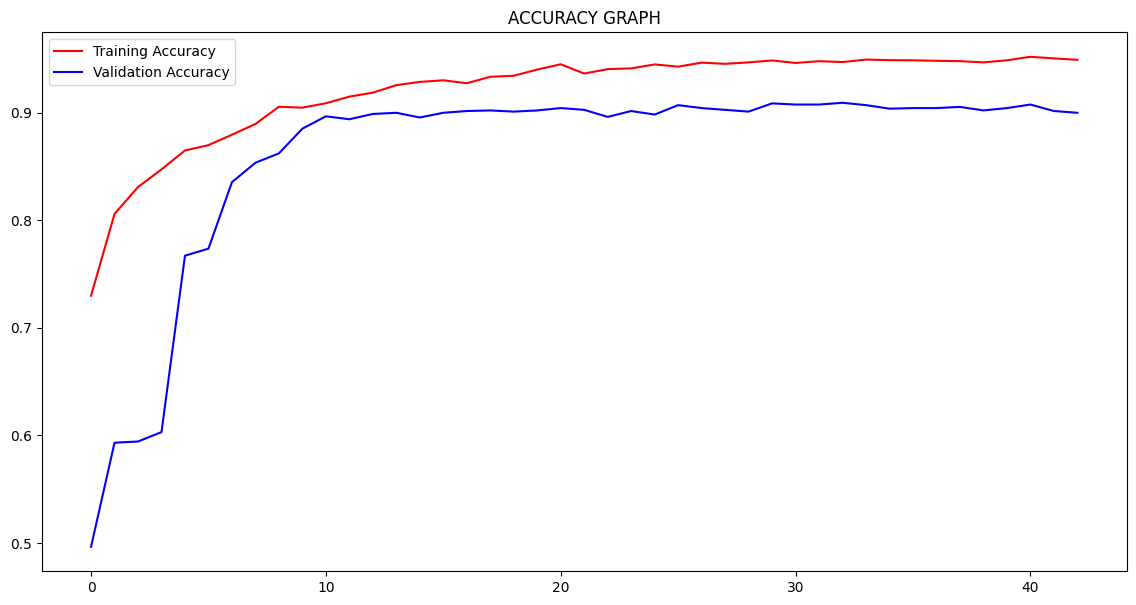

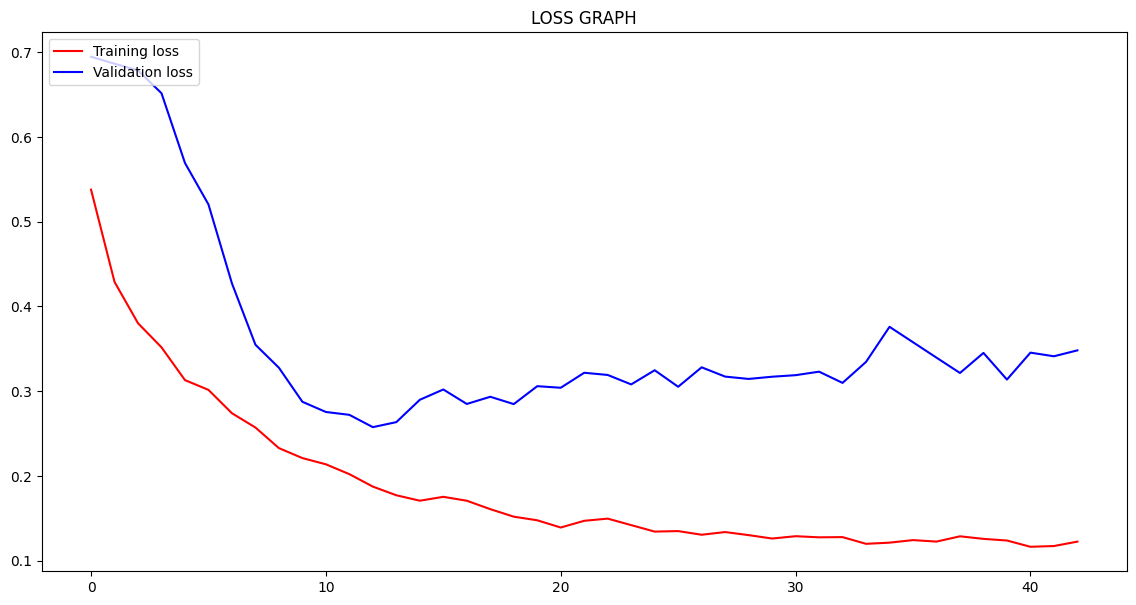

72/72 [==============================] - 6s 78ms/step


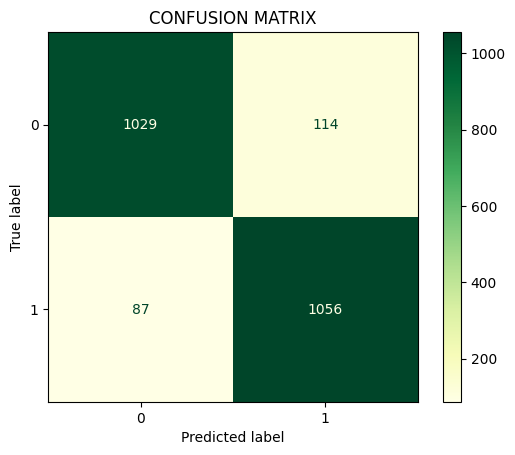

In [ ]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)